# Wrong prediction

In [9]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow import keras

In [10]:
valid_data_dir = '/home/eyan/Desktop/bug_bite/web_scraping/useful/validation'

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_generator = test_datagen.flow_from_directory(
    valid_data_dir, 
    target_size=(299, 299),
    batch_size=1,shuffle=False,
    class_mode='categorical') 


Found 201 images belonging to 7 classes.


In [11]:
model_dir = '/home/eyan/Desktop/bug_bite/Flask_app/modelv1'

model = tf.keras.models.load_model(model_dir)

In [12]:
imagenames = test_generator.filenames

nb_samples = len(imagenames)

In [13]:
predict = model.predict(test_generator, steps=nb_samples)

In [14]:
from sklearn.metrics import confusion_matrix


y_pred = np.argmax(predict,axis=1)
# y_pred = np.rint(predict)
y_true = test_generator.classes


print(confusion_matrix(y_true, y_pred))

[[20  2  2  0  2  0  2]
 [ 0 18  2  0  1  1  1]
 [ 0  0 21  0  1  1  0]
 [ 2  0  1 35  0  0  0]
 [ 0  0  1  3 32  0  2]
 [ 1  0  0  0  0 20  3]
 [ 0  0  0  1  0  0 26]]


In [ ]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [15]:
errors = np.where(y_pred != y_true)[0]
wrong_file = {}
for i in errors:
    wrong_file[i]=imagenames[i]

In [22]:
len(wrong_file)

29

In [17]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

In [18]:
import pathlib
import numpy as np
data_dir = '/home/eyan/Desktop/bug_bite/web_scraping/useful/train'
data_dir = pathlib.Path(data_dir)
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])

In [19]:
print([CLASS_NAMES])

[array(['ants', 'chiggers', 'rash', 'negative', 'bed_bugs', 'spiders',
       'ticks'], dtype='<U8')]


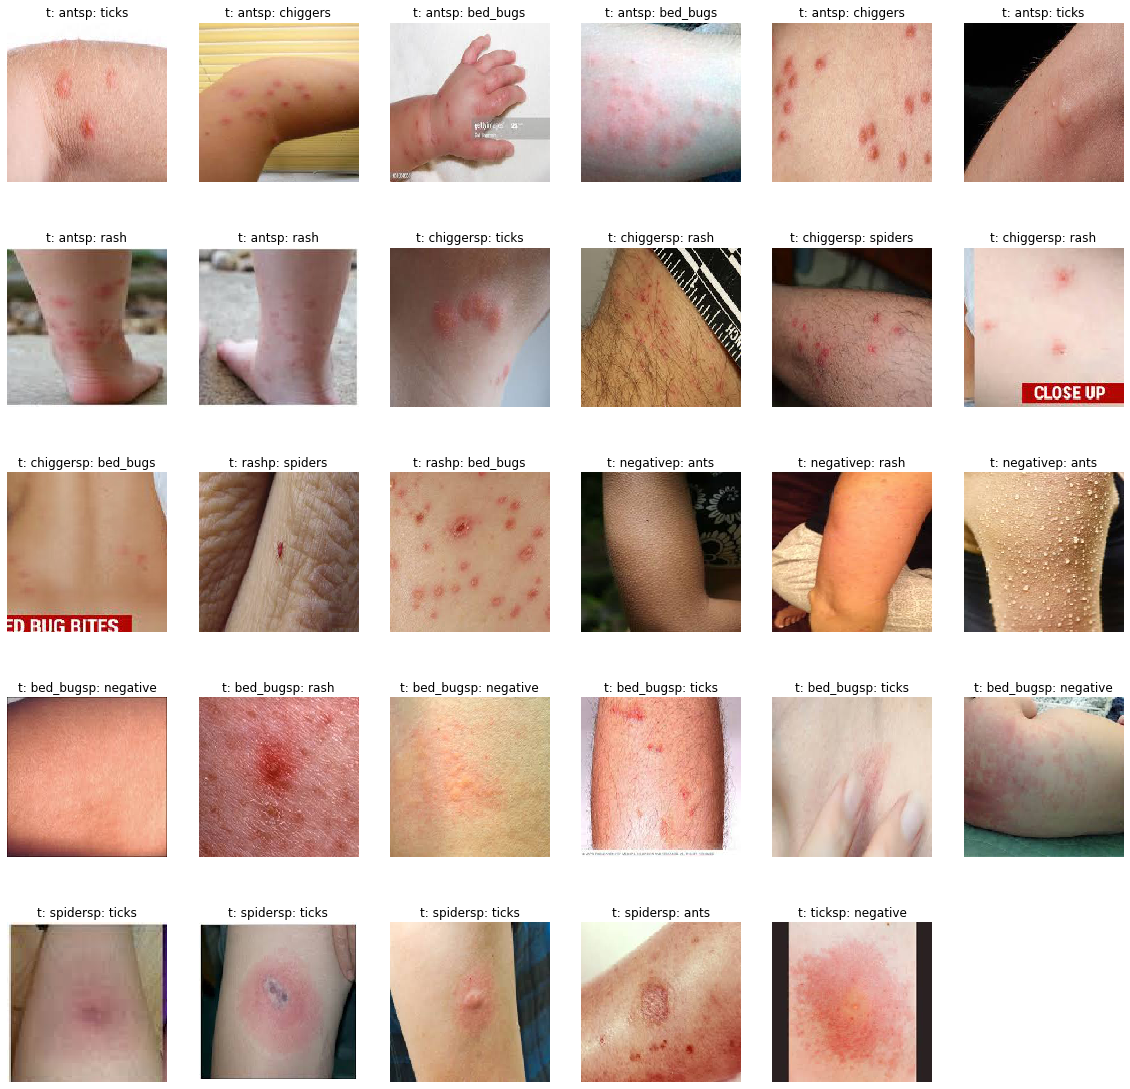

In [21]:
from keras.preprocessing import image
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os

plt.figure(figsize=(20,20))
n=0
for i, name in wrong_file.items():
    img_path = os.path.join(valid_data_dir,name)
    img = image.load_img(img_path, target_size=(299, 299))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    ax = plt.subplot(5,6,n+1)
    n+=1
    plt.imshow(img_tensor[0])
    plt.title("t: "+str(CLASS_NAMES[y_true[i]])+"p: "+str(CLASS_NAMES[y_pred[i]]))
    plt.axis('off')
    
plt.show()